# BeautifulSoup 으로 네이버 영화 평점 크롤링해서 엑셀로 저장

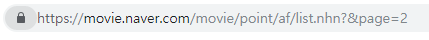

* 네이버 영화 평점 사이트의 주소를 보고 서버에 어떻게 쿼리를 하는지 추측해 봅니다.
* 특별한건 없고 page=값 으로 페이징 처리를 하는것을 알 수 있습니다.

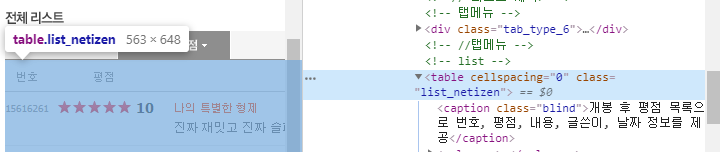

* 개발자도구를 활용하여 무엇을 크롤링할지 어떻게 접근해야할지 계획을 세워야 합니다.
* 네이버 영화평점은 클래스명이 list_netizen 인 큰 &#60;TABLE&#62; 태그안에 있으며 하위 TR 태그로 접근하는게 좋을듯 합니다.

In [1]:
# 크롤링에 필요한 라이브러리
import requests
from bs4 import BeautifulSoup

# 네이버 영화 평점 URL
url = "https://movie.naver.com/movie/point/af/list.nhn?&page=1"
r = requests.get(url)
bs = BeautifulSoup(r.text, "lxml")

# 필요한 평점 데이터 접근 selector
tables = bs.select("table.list_netizen > tbody > tr")
for tr in tables:
    print(tr)

<tr>
<td class="ac num">15616275</td>
<td><div class="fr point_type_n"><div class="mask" style="width:100.0%"></div></div></td>
<td class="point">10</td>
<td class="title">
<a class="movie" href="?st=mcode&amp;sword=107928&amp;target=after">퓨리</a>
<br/>와 태어나서처음으로 평점단다. 전쟁영화잘안보는데이건 머 대체불가능불가항력적인 영화다 박평식은 평론가니 뇌기능장애인이분명해 헤어진남친 생각 진심 12분 안으로 접히고 빠져든다 이시대엔 전쟁이 없다는게 아쉽다.삶의감사함을 절실히느껴보고싶다.개인취향. 
			
			
			
				
				
				
				<a class="report" href="javascript:report('rkdt****', 'RTHhuT0g6FoT/l5TMnLUxGec6KChXutrgSBeGOtI/5g=', '와 태어나서처음으로 평점단다. 전쟁영화잘안보는데이건 머 대체불가능불가항력적인 영화다 박평식은 평론가니 뇌기능장애인이분명해 헤어진남친 생각 진심 12분 안으로 접히고 빠져든다 이시대엔 전쟁이 없다는게 아쉽다.삶의감사함을 절실히느껴보고싶다.개인취향.', '15616275', 'point_after');" style="color:#8F8F8F" title="새 창">신고</a>
</td>
<td class="num"><a class="author" href="javascript:find_list('nickname','15616275','after');">rkdt****</a><br/>19.05.04</td>
</tr>
<tr>
<td class="ac num">15616274</td>
<td><div class="fr point_type_n"><div class="mask" style="width:90.0%"></div></div></td>


### 네이버 영화 테이블 태그 구조 이해

&#60;TABLE class='list_netizen'&#62;  
&nbsp;&nbsp;&nbsp;&nbsp;&#60;TBODY&#62;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#60;TR&#62;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#60;TD&#62;번호&#60;/TD&#62;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#60;TD&#62;별그림&#60;/TD&#62;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#60;TD&#62;평점&#60;/TD&#62;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#60;TD&#62;영화제목/내용&#60;/TD&#62;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#60;TD&#62;글쓴이&#60;/TD&#62;  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&#60;/TR&#62;  
&nbsp;&nbsp;&nbsp;&nbsp;&#60;/TBODY&#62;  
&#60;/TABLE&#62;  


* TD 들을 둘러싼 TR 들이 반복되는 구조로 되어있습니다.
* 여기서 테이블 태그의 TR 은 TBODY를 통해야만 접근이 됩니다.
* 뷰티풀숩의 Selector 는 table.list_netizen > tbody > tr 로 접근합니다.

In [3]:
# 크롤링에 필요한 라이브러리
import requests
from bs4 import BeautifulSoup

# 네이버 영화 평점 URL
url = "https://movie.naver.com/movie/point/af/list.nhn?&page=1"
r = requests.get(url)
bs = BeautifulSoup(r.text, "lxml")

# 필요한 평점 데이터 접근 selector
tables = bs.select("table.list_netizen > tbody > tr")
for tr in tables:
    # tr 하위의 td 로 접근
    tds = tr.select("td")
    # 정상적이라면 td 의 갯수는 5개 입니다. 
    # 개발자도구로 테이블을 찍어보면 확인 가능
    # 5개가 아니라면 오류로 판단하고 루프 반복
    if len(tds) != 5: 
        cotinue

    # 2번째 td 가 실제 평점
    point = int(tds[2].text)
    # 3번째 td에 A 태그의 text 값에 영화 제목이 있음
    movie = tds[3].select("a[href]")[0].text
    # 작성자가 *** 로 표기되긴 하지만 그래도 구해놓음
    writer = tds[4].select("a")[0].text
    
    print(movie, point, writer)

극한직업 10 youm****
나의 특별한 형제 10 youm****
뺑반 9 elfs****
퓨리 10 rkdt****
어벤져스: 엔드게임 9 cfdl****
왓칭 1 grem****
가버나움 10 good****
나의 특별한 형제 10 sona****
어벤져스: 엔드게임 10 kore****
캡틴 마블 1 cgc0****


### 기능 확장

* 함수로 변경하고 페이징 기능을 추가 합니다.
* 엑셀 파일로 저장 기능을 추가합니다.
* 엑셀 파일로 저장하기 위해선 2가지 외부 라이브러리를 설치해야 합니다.
    > pip install pandas openpyxl

In [ ]:
# 크롤링에 필요한 라이브러리
import requests
from bs4 import BeautifulSoup

# 엑셀에 저장하기 위해 필요한 라이브러리 임포트
# openpyxl 라이브러리는 pandas 내부에서 사용하므로 따로 import 안해도 됨
import pandas

def get_movie_data(page, end_page=None):
    '''네이버 영화 평점을 크롤링 하는 함수
    
    Args:
        page (int) : 현재 페이지
        end_page (int) : 마지막 페이지
    Returns:
        list : 수집된 영화 목록 리스트
    '''
    
    # 페이징 처리를 위해 URL 뒤에 ?&page= 파라메타를 전달해야 합니다.
    url = "https://movie.naver.com/movie/point/af/list.nhn?&page={}".format(page)
    r = requests.get(url)
    bs = BeautifulSoup(r.text, "lxml")

    # end_page 값이 디폴트 상태인 None 으로 넘어왔다면
    # 1 페이지라고 판단하고 총 게시물 갯수를 구해 end_page를 계산합니다.
    if end_page is None:
        # 총 평점 갯수 접근
        counts = int(bs.select("strong.c_88.fs_11")[0].text)
        # 총 갯수 / 페이지당 출력수(10개) = 최대 페이지 수
        end_page = int(counts / 10)
        
        # 11 / 10 인경우 몫은 1 이지만 페이지는 2페이지까지 가야하니
        # 나머지가 0보다 크면 end_page 를 1 증가 시킵니다.
        if (end_page % 10) > 0:
            end_page += 1

        # 테스트 목적으로 10페이지에서 중단하도록 설정했습니다.
        if end_page > 10:
            end_page = 10

    # 최종 결과를 리턴할 리스트 변수
    results = []
    
    # 평점 테이블 접근
    tables = bs.select("table.list_netizen > tbody > tr")
    for tr in tables:
        tds = tr.select("td")
        if len(tds) != 5: 
            continue

        point = int(tds[2].text)
        movie = tds[3].select("a[href]")[0].text
        writer = tds[4].select("a")[0].text
        results.append([movie, point, writer])
        
    # 현재 페이지가 end_page 보다 작으면
    if page < end_page:
        # 현재 페이지를 증가시키고
        page += 1
        # 자기 스스로를 호출합니다.(재귀함수)
        results.extend(get_movie_data(page, end_page=end_page))
    
    # 최종 결과 리스트 리턴
    return results

# 판다스 데이터 프레임을 통해 엑셀에 저장하기 위해
# 컬럼을 설정 합니다.
column = ["영화제목", "평점", "작성자"]

# 메인 함수를 호출하여 영화 평점을 구해 results 에 저장
results = get_movie_data(1)

# pandas 의 DataFrame을 이용해 최종 list를 배열화 시킵니다.
dataframe = pandas.DataFrame(results, columns=column)

# cvs 파일로 저장하기 위해선 아래처럼 할 수 있습니다.
#dataframe.to_csv("movie.csv", header=False, index=False)

# 엑셀로 저장(파일명, 시트명, 컬럼명, 헤더존재여부, 시작 row=1 생략하면 0부터 시작)
dataframe.to_excel("movie.xlsx", 
                    sheet_name="네이버영화", 
                    columns=column,
                    header=True,
                    startrow=1
                    )